In [6]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('../')

import numpy as np
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

from neurodsp.spectral import compute_spectrum # finds PSD
from fooof import FOOOFGroup, FOOOF # oscillation fitting library
from utils.load_data import alldat, pre_process, comp_avg_signal

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat1 = alldat[0][0]
dat2 = alldat[0][1]

print(dat1.keys())
print(dat2.keys())
print(alldat.shape)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dict_keys(['t_off', 'stim_id', 't_on', 'srate', 'V', 'scale_uv', 'locs'])
dict_keys(['t_off', 'stim_id', 't_on', 'srate', 'V', 'scale_uv', 'locs'])
(7, 2)


https://neurodsp-tools.github.io/neurodsp/_modules/neurodsp/spectral/power.html
```
nperseg : int, optional
        Length of each segment, in number of samples.
        If None, and window is str or tuple, is set to 1 second of data.
        If None, and window is array_like, is set to the length of the window.
noverlap : int, optional
    Number of points to overlap between segments.
    If None, noverlap = nperseg // 8.
```
        
max length is 9960??

Comparison plots 
- what are the differences and what are the right features
- How do they vary
- Make list of things we want to compare (spectral features)
- Compare classifier performances based on what you see in the plots

In [7]:
kwargs = {'fs':1000, 'nperseg':None, 'noverlap':None}

nonfilter_overt = pre_process(subj=0, exp=0)
nonfilter_imag = pre_process(subj=0, exp=1)
sample_overt = comp_avg_signal(nonfilter_overt, 9960, 'hand')
sample_imag = comp_avg_signal(nonfilter_imag, 9960, 'hand')
signals = {'overt': sample_overt, 'imag': sample_imag}
psds = {'overt' : [], 'imag' : [] }
for chan in range(46):
    for k in psds.keys():
        freqs, powers = compute_spectrum(signals[k][:,chan], **kwargs)
        psds[k].append(powers)
for k in psds.keys():
    psds[k] = np.array(psds[k])

# How to average across subjects when there are different electrode conditions/subject?

In [165]:
for i in range(7):
    print(alldat[i][1]['V'].shape)

(376600, 46)
(390320, 64)
(376840, 48)
(390200, 48)
(390160, 64)
(390200, 64)
(390920, 64)


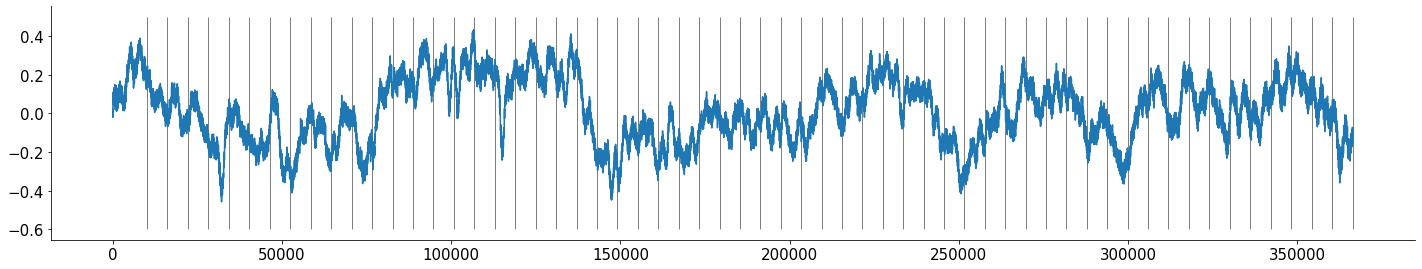

In [175]:
plt.plot(np.linspace(0, dat1['t_on'][-1], 9960), sample_imag[:,12])
for t in dat1['t_on']:
    plt.vlines(t, -0.6, 0.5, lw=0.5)

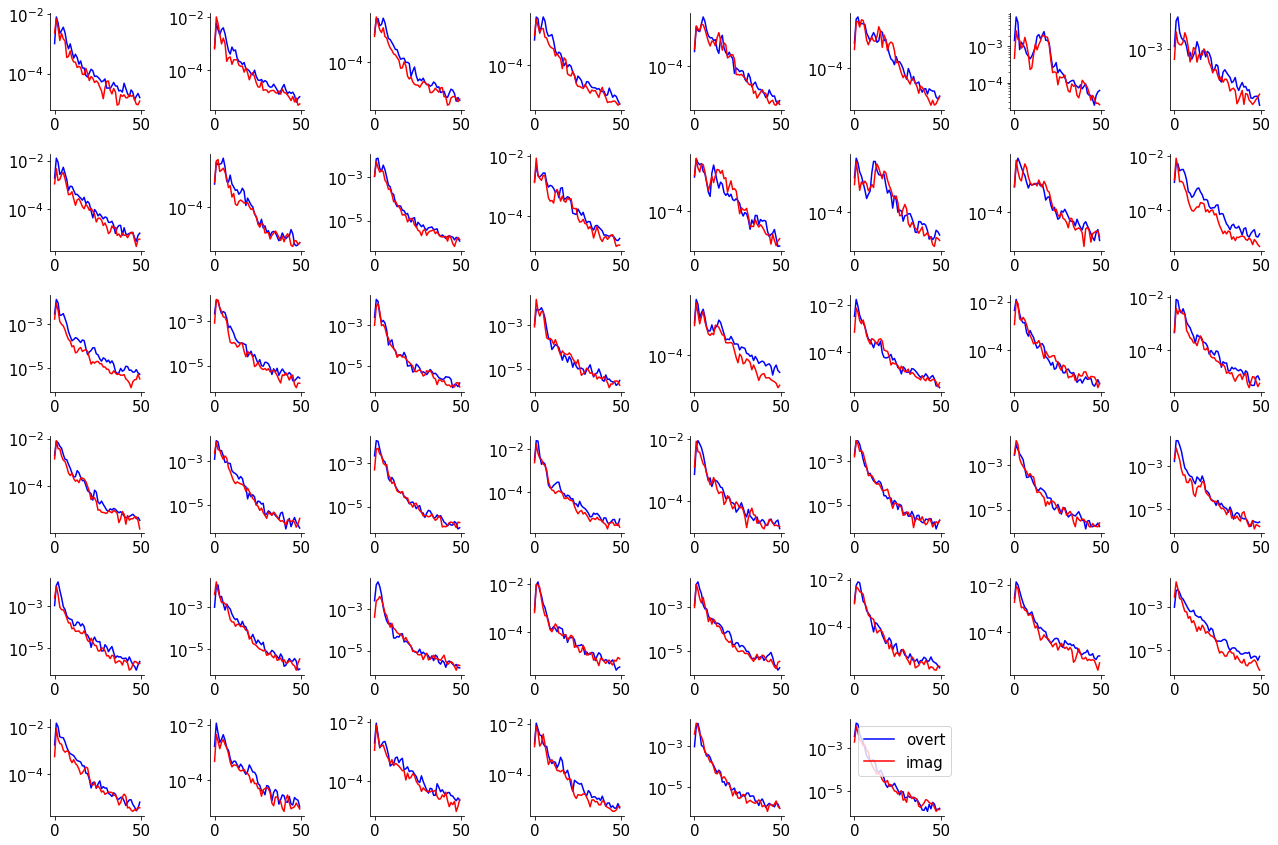

In [9]:
plt.figure(figsize=(18,12))
for i in range(46):
    plt.subplot(6,8,i+1)
    plt.semilogy(freqs[:50],psds['overt'][i][:50], color = 'blue', label='overt')
    plt.semilogy(freqs[:50],psds['imag'][i][:50], color = 'red', label = 'imag')
    
plt.legend()

Text(0.5, 1.0, 'Mean spectra, subject 0')

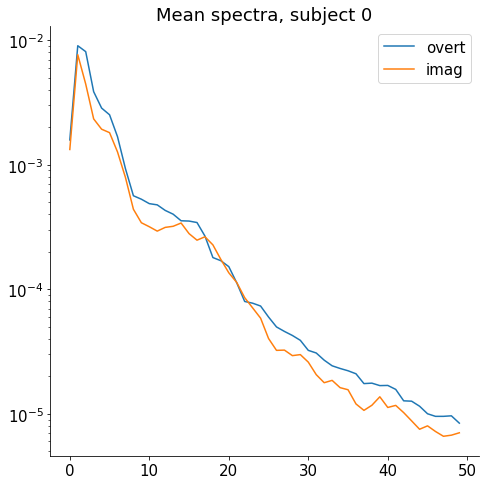

In [153]:
plt.figure(figsize=(7,7))
plt.semilogy(freqs[:50],psds['overt'].mean(0)[:50], label='overt')
plt.semilogy(freqs[:50],psds['imag'].mean(0)[:50], label='')
plt.legend(); plt.title('Mean spectra, subject 0')

# Fitting oscillations

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/fooof-1.0.0rc1-py3.7.egg/fooof/group.py:231: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for index, data in enumerate(self.group_results)])
/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)


                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 46                             
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                               Power spectra were fit with a knee.                                
                                                                                                  
          

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


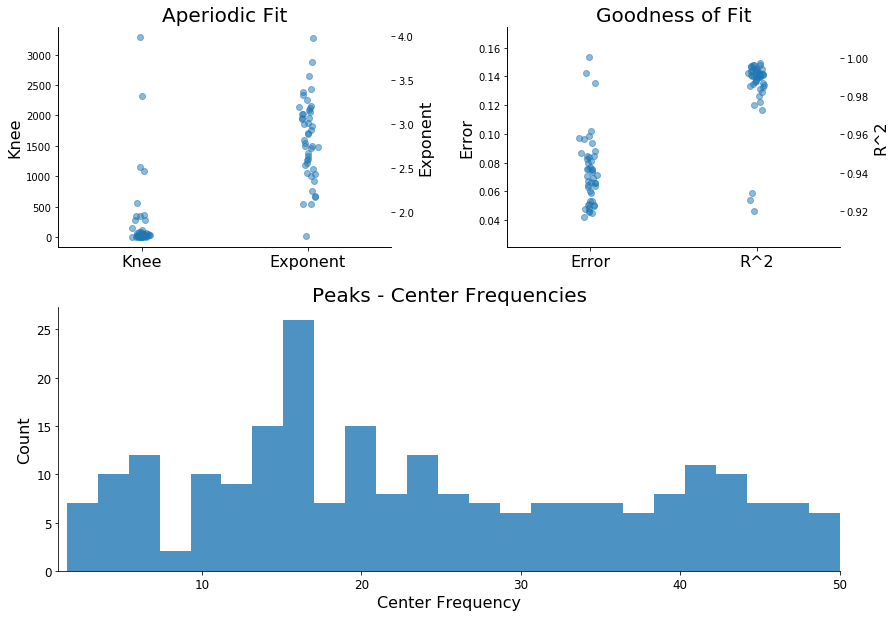

In [152]:
import fooof
from fooof import FOOOFGroup

fg = fooof.FOOOFGroup(aperiodic_mode='knee', verbose = False) # try fixed vs knee
fg.fit(freqs, psds['overt'], [0,50])
fg.report(freqs, psds['overt'], [0,50])

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/fooof-1.0.0rc1-py3.7.egg/fooof/core/funcs.py:65: RuntimeWarning: invalid value encountered in log10
/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/fooof-1.0.0rc1-py3.7.egg/fooof/core/funcs.py:65: RuntimeWarning: invalid value encountered in log10
/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/fooof-1.0.0rc1-py3.7.egg/fooof/group.py:231: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  for index, data in enumerate(self.group_results)])
/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)


                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 46                             
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                               Power spectra were fit with a knee.                                
                                                                                                  
          

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


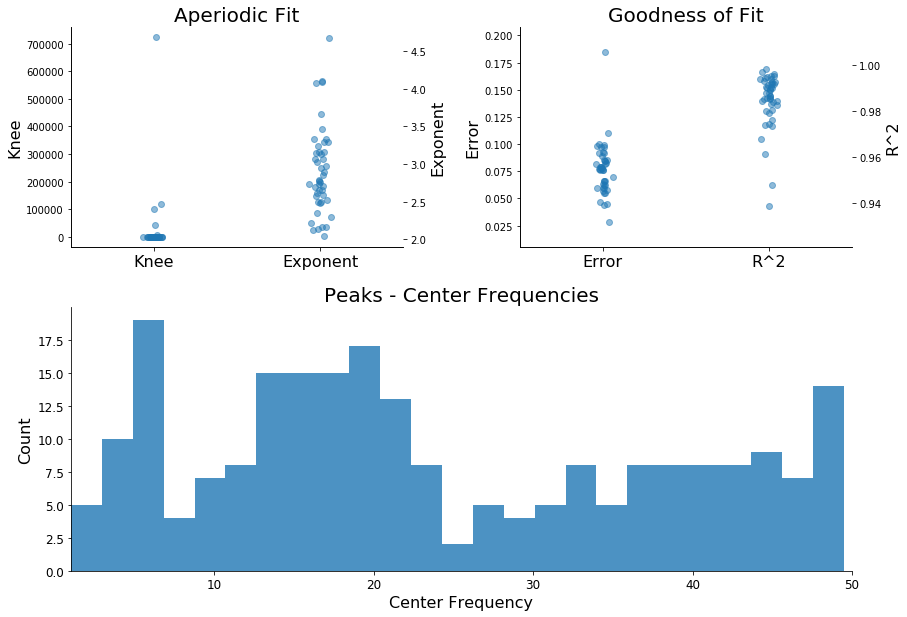

In [154]:
fg = fooof.FOOOFGroup(aperiodic_mode='knee', verbose = False) # try fixed vs knee
fg.fit(freqs, psds['imag'], [0,50])
fg.report(freqs, psds['imag'], [0,50])